Found 1118 images belonging to 10 classes.
Found 283 images belonging to 10 classes.
Epoch 1/20
9/8 [=================================] - 75s 8s/step - loss: 4.4501 - acc: 0.1342 - val_loss: 2.7217 - val_acc: 0.1898
Epoch 2/20
9/8 [=================================] - 69s 8s/step - loss: 2.7962 - acc: 0.1404 - val_loss: 2.1241 - val_acc: 0.2336
Epoch 3/20
9/8 [=================================] - 64s 7s/step - loss: 2.2306 - acc: 0.1986 - val_loss: 2.1212 - val_acc: 0.2194
Epoch 4/20
9/8 [=================================] - 67s 7s/step - loss: 2.1154 - acc: 0.2165 - val_loss: 2.0126 - val_acc: 0.3114
Epoch 5/20
9/8 [=================================] - 66s 7s/step - loss: 2.0356 - acc: 0.2576 - val_loss: 1.8923 - val_acc: 0.3163
Epoch 6/20
9/8 [=================================] - 63s 7s/step - loss: 2.0132 - acc: 0.2764 - val_loss: 1.9211 - val_acc: 0.3161
Epoch 7/20
9/8 [=================================] - 64s 7s/step - loss: 1.9649 - acc: 0.3014 - val_loss: 1.8563 - val_acc: 0.352

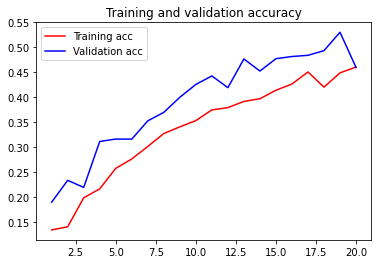

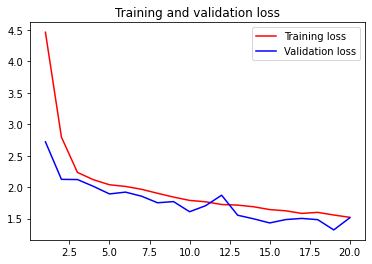

In [3]:
import matplotlib.pylab as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization, Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras.optimizers import Adam,RMSprop,SGD
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/10-monkey-species/monkey_labels.txt")
#print(df)

height=150
width=150
channels=3
batch_size=128
seed=1337

train_dir = Path('/content/drive/My Drive/Colab Notebooks/10-monkey-species/training/training')
test_dir = Path('/content/drive/My Drive/Colab Notebooks/10-monkey-species/validation/validation')

# Training generator
train_datagen = ImageDataGenerator(rotation_range = 30
                                   ,rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  class_mode='categorical')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["acc"])
history = model.fit_generator(train_generator,
        steps_per_epoch= 1027/batch_size,
          epochs=20,
          verbose=1,
          validation_data=test_generator,
                    validation_steps= 4)

model.summary()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()